# Notebook pour le tracé des séries temporelles d'indicateurs  (STATS)
## Pour la comparaison de plusieurs zones (AREAS) pour un même indicateur

### Initialisation contexte test appli

In [1]:
import os

WRK_DIR = os.path.normpath('D:/MATHIS/0_Projet_Secheresse/1_Scripts/toolbox/eo4dm-oeil/EO4DM')
os.chdir(WRK_DIR)
WRK_DIR= os.path.join('Y:/EO4DM')

TERRITORY = 'New Caledonia (Fr)'
PRODUCT = 'VHI'
LANDMASK = '' # if no mask set ''
PERIOD = 'M'    # D=decade, M=month
AREAS = ['POUEMBOUT']

TERRITORY_str = TERRITORY.replace(' ', '_').replace('(', '').replace(')', '')
DATA_HISTO = os.path.join(WRK_DIR,'DATA_HISTO',TERRITORY_str)
ANNEX_DIR = os.path.join(WRK_DIR,'ANNEX',TERRITORY_str)
INDIR_STATS = os.path.join(DATA_HISTO,'1_INDICATEURS/GLOBAL/STATS')

In [2]:
import glob
import pandas as pd
import matplotlib.pyplot as plt

### Prépare le dossier de sortie

In [3]:
# --- Generate directories/sub-directories ---
OUTDIR_STATS = os.path.join(WRK_DIR, f'PLOT_TIME_SERIES_DROUGHT_{TERRITORY_str}')
os.umask(0) # used to reset the directories permission
if not os.path.exists(OUTDIR_STATS):
    os.makedirs(OUTDIR_STATS)
    os.chmod(OUTDIR_STATS, 0o777)

### Lecture et préparation des données

In [4]:
instats_csv = glob.glob(os.path.join(INDIR_STATS, f'*STATS*{PERIOD}*{LANDMASK}*.csv'))[0]
instats_df = pd.read_csv(instats_csv,sep=';',decimal='.')

try:
    instats_df['DATE'] = pd.to_datetime(instats_df.DATE, format='%Y-%m-%d')
except ValueError:
    instats_df['DATE'] = pd.to_datetime(instats_df.DATE, format='%d/%m/%Y')

if len(AREAS)!=0:
    instats_df = instats_df[instats_df['LOCATION'].isin(AREAS)]


In [6]:
instats_df

,LOCATION,DATE,MEAN,MIN,MAX,STD,QSCORE
26,POUEMBOUT,2001-01-01,0.45,0.00,1.00,0.17,0.15
60,POUEMBOUT,2002-01-01,0.26,0.00,0.77,0.15,0.19
94,POUEMBOUT,2003-01-01,0.23,0.00,0.89,0.15,0.21
128,POUEMBOUT,2004-01-01,0.33,0.00,0.87,0.14,0.24
162,POUEMBOUT,2005-01-01,0.33,0.00,0.96,0.22,0.15
...,...,...,...,...,...,...,...
9648,POUEMBOUT,2023-09-01,0.80,0.23,1.00,0.13,0.21
9682,POUEMBOUT,2023-10-01,0.83,0.07,1.00,0.14,0.17
9716,POUEMBOUT,2023-11-01,0.61,0.00,1.00,0.21,0.15
9750,POUEMBOUT,2023-12-01,0.55,0.05,1.00,0.19,0.14


### Tracé et export du graphe

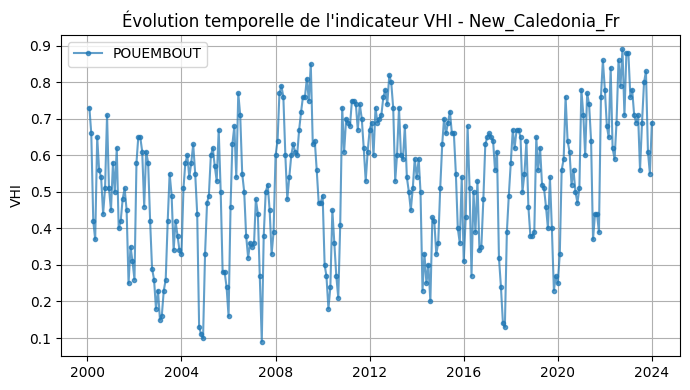

In [7]:
fig, ax = plt.subplots(figsize=(7, 4))

for a in AREAS:
    instats_a_df = instats_df[instats_df['LOCATION'] == a].sort_values(by='DATE')
    if a=='"Fiji"': a='Fiji'
    elif a=='Western': a='Viti-Levu (West)'
    elif a=='Central': a='Viti-Levu (East)'
    elif a=='"Vanuatu"': a='Vanuatu'
    elif a=='Torba Province': a='Torba Province (North)'
    elif a=='Shefa Province': a='Shefa Province (Efaté)'
    plt.plot(instats_a_df['DATE'], instats_a_df['MEAN'], marker='o', markersize=3, alpha=0.7, label=a)

plt.grid(True)
plt.title(f'Évolution temporelle de l\'indicateur {PRODUCT} - {TERRITORY_str}')
plt.ylabel(PRODUCT)
plt.legend()
plt.tight_layout()
plt.show()

if LANDMASK!='': LANDMASK=f'_{LANDMASK}'

fig.savefig(os.path.join(OUTDIR_STATS, f'timeseries_{PERIOD}_{PRODUCT}_{TERRITORY_str}{LANDMASK}.png'), dpi=300)
